Всего доступно 20 тысяч размеченных изображений размером 48x48 с 3 цветовыми каналами (RGB), поэтому массив images имеет размер (20000, 48, 48, 3). В массиве labels содержатся ответы к тренировочному набору изображений. В английском алфавите 26 букв: 0-й класс соответствует букве А и так далее по алфавиту, 25-й класс — буква Z.

Ваша задача — обучить нейронную сеть и с ее помощью предсказать метки классов для изображений из файла images_sub.npy, в нем 50 тысяч изображений. Посмотрите на структуру файла sample_submission.csv — он не содержит полезных данных, а лишь описывает формат, в котором вы загружаете ваши предсказания на сайт. Создайте из ваших предсказаний такой же файл и загрузите в качестве вашего ответа (сабмита). Вы можете делать до 20 сабмитов в сутки.

Метрика лидерборда — accuracy, то есть доля правильно распознанных изображений.

Нотбук с базовым решением расположен в Google Colab. Попробуйте решить задачу, не обращаясь к нему. Задача будет считаться решенной, если в Public Leaderboard вы наберете score, который будет равен или больше 0.82.

# **1 ИМПОРТ БИБЛИОТЕК**

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **2 ИМПОРТ ДАННЫХ**

In [5]:
images = np.load('D:/mifi/myvenv/advance dl/mds-misis-dl-captchan/images.npy')
labels = np.load('D:/mifi/myvenv/advance dl/mds-misis-dl-captchan/labels.npy')
images_sub = np.load('D:/mifi/myvenv/advance dl/mds-misis-dl-captchan/images_sub.npy')

# Проверка размеров массивов
print(f"Размер данных images: {images.shape}")
print(f"Размер данных labels: {labels.shape}")
print(f"Размер данных images_sub: {images_sub.shape}")

Размер данных images: (20000, 48, 48, 3)
Размер данных labels: (20000,)
Размер данных images_sub: (50000, 48, 48, 3)


Общая информация о данных:

- В данных images находится 20 000 изображений размерами 48x48 c 3 каналами цвета;

- В данных labels находится 20 000 метод для изображений для изображений images;

- В данных igames_sub находится 50 000 изображений размерами 48x48 c 3 каналами цвета.

# **3 ПРЕДОБРАБОТКА ДАННЫХ**
Нормализуйте изображения, преобразуйте метки классов в one-hot encoding и разделите данные на тренировочный и валидационный наборы.

## **3.1 Нормализация данных**

In [ ]:
images = images / 255.0
images_sub = images_sub / 255.0

## **3.2 One-Hot-Encoding**

In [8]:
labels_one_hot = to_categorical(labels, num_classes=26)

## **3.3 Разделение данных**

In [10]:
X_train, X_val, y_train, y_val = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

## **3.4 Форма данных**

In [11]:
print(f"Размер тренировочного набора: {X_train.shape}, {y_train.shape}")
print(f"Размер валидационного набора: {X_val.shape}, {y_val.shape}")

Размер тренировочного набора: (16000, 48, 48, 3), (16000, 26)
Размер валидационного набора: (4000, 48, 48, 3), (4000, 26)


# **4 СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛИ**


## **4.1 Создание архитектуры модели**

In [12]:
model = Sequential([
	Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)),
	Conv2D(64, (3, 3), activation='relu'),
	MaxPooling2D((2, 2)),
	Dropout(0.25),
	Conv2D(128, (3, 3), activation='relu'),
	Conv2D(128, (3, 3), activation='relu'),
	MaxPooling2D((2, 2)),
	Dropout(0.25),
	Flatten(),
	Dense(256, activation='relu'),
	Dropout(0.6),
	Dense(26, activation='softmax')
])

d:\mifi\myvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **4.2 Компиляция модели**

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,654,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,921,306 (11.14 MB)

 Trainable params: 2,921,306 (11.14 MB)

 Non-trainable params: 0 (0.00 B)

# **4.3 ОБУЧЕНИЕ МОДЕЛИ**


In [15]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 46s 85ms/step - accuracy: 0.0472 - loss: 3.2510 - val_accuracy: 0.1007 - val_loss: 3.1151
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.1470 - loss: 2.9257 - val_accuracy: 0.4708 - val_loss: 1.9152
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.3814 - loss: 2.0737 - val_accuracy: 0.6040 - val_loss: 1.3904
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 86ms/step - accuracy: 0.4804 - loss: 1.6916 - val_accuracy: 0.6760 - val_loss: 1.1608
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 86ms/step - accuracy: 0.5628 - loss: 1.4300 - val_accuracy: 0.7092 - val_loss: 1.0199
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 88ms/step - accuracy: 0.5944 - loss: 1.3117 - val_accuracy: 0.7280 - val_loss: 0.9543
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.6241 - loss: 1.1818 - val_accuracy: 0.7477 - val_loss: 0.8458
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.6503 - loss: 1.1065 - 

# **5 КАЧЕСТВО МОДЕЛИ**

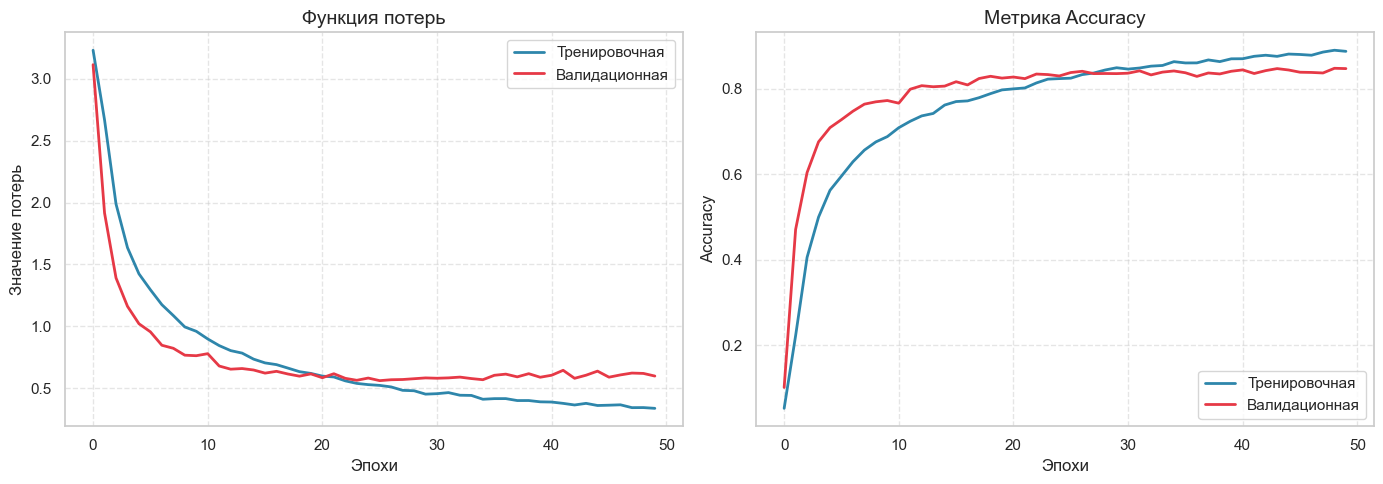

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 5))

# --- График функции потерь ---
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренировочная', color='#2E86AB', linewidth=2)
plt.plot(history.history['val_loss'], label='Валидационная', color='#E63946', linewidth=2)
plt.title('Функция потерь', fontsize=14)
plt.xlabel('Эпохи', fontsize=12)
plt.ylabel('Значение потерь', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# --- График Accuracy ---
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренировочная', color='#2E86AB', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Валидационная', color='#E63946', linewidth=2)
plt.title('Метрика Accuracy', fontsize=14)
plt.xlabel('Эпохи', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)

# Добавляем немного отступов между графиками
plt.tight_layout()

# Сохраняем изображение (если нужно)
# plt.savefig("training_history.png", dpi=300, bbox_inches='tight')

# Отображаем
plt.show()

# **6 ПРЕДСКАЗАНИЕ**

In [22]:
predictions = model.predict(images_sub)
predicted_classes = predictions.argmax(axis=1)

submission = pd.DataFrame({
    'Id': range(len(predicted_classes)),
    'Category': predicted_classes
})
submission.to_csv('submission.csv', index=False)

print("Файл сабмита сохранен как submission1.csv")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step
Файл сабмита сохранен как submission1.csv
